In [ ]:
# Sử dụng các thư viện sau để train mô hình
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Chuyển đến file Google Drive chứa bộ ảnh đã tải lên
%cd"/content/drive/MyDrive/Colab Notebooks/BT_AI/NHAN DIEN NGUOI/"

/content/drive/MyDrive/Colab Notebooks/BT_AI/NHAN DIEN NGUOI


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tải bộ dữ liệu training set
training_set=train_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/BT_AI/NHAN DIEN NGUOI/Training_set",target_size=(150,150), batch_size=32, class_mode='categorical')

Found 120 images belonging to 3 classes.


In [ ]:
# Tải bộ dữ liệu validation
validation=train_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/BT_AI/NHAN DIEN NGUOI/Validation",target_size=(150,150), batch_size=32, class_mode='categorical')

Found 18 images belonging to 3 classes.


In [ ]:
# Xem các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'DUOC': 0, 'GIANG': 1, 'TRIEN': 2}

In [ ]:
# Xem các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'DUOC': 0, 'GIANG': 1, 'TRIEN': 2}

In [ ]:
# Tạo mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
# Biên dịch mô hình
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#Train mô hình với 100 lần học (epochs), mỗi lần học 50 dữ liệu (batch_size), khi sai số không thay đổi trong 70 lần học thì sẽ␣ dừng việc train
history=model.fit(training_set,epochs=500,batch_size=50,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=70)])

Epoch 1/500
4/4 [==============================] - 49s 10s/step - loss: 9.5841 - accuracy: 0.3417 - val_loss: 1.0349 - val_accuracy: 0.3333
Epoch 2/500
4/4 [==============================] - 3s 824ms/step - loss: 1.0482 - accuracy: 0.4000 - val_loss: 0.8978 - val_accuracy: 0.5556
Epoch 3/500
4/4 [==============================] - 3s 821ms/step - loss: 0.8057 - accuracy: 0.6250 - val_loss: 0.6096 - val_accuracy: 0.7778
Epoch 4/500
4/4 [==============================] - 3s 819ms/step - loss: 0.5387 - accuracy: 0.7583 - val_loss: 0.6315 - val_accuracy: 0.7778
Epoch 5/500
4/4 [==============================] - 3s 817ms/step - loss: 0.2423 - accuracy: 0.9333 - val_loss: 0.3073 - val_accuracy: 0.9444
Epoch 6/500
4/4 [==============================] - 3s 810ms/step - loss: 0.1199 - accuracy: 0.9667 - val_loss: 0.5202 - val_accuracy: 0.8889
Epoch 7/500
4/4 [==============================] - 3s 817ms/step - loss: 0.1303 - accuracy: 0.9583 - val_loss: 0.2891 - val_accuracy: 0.8889
Epoch 8/500
4/

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 2.385093239354319e-06
Train Accuracy 1.0


<function matplotlib.pyplot.show>

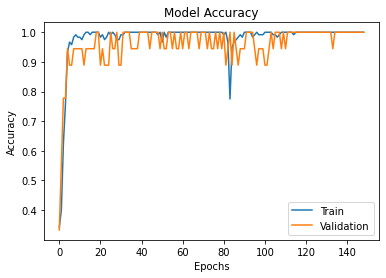

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Lưu lại
model.save("NHAN DIEN NGUOI.h5")

In [ ]:
# Tải mô hình 
model_CNN=load_model('NHAN DIEN NGUOI.h5')

In [ ]:
# Kiểm tra hình của từng bạn với bộ dữ liệu test_set

DUOC


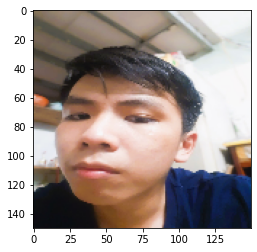

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/BT_AI/NHAN DIEN NGUOI/Test_set/DuocT2.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='DUOC'
if round(result[0][1])==1:
  prediction='GIANG'
if round(result[0][2])==1:
  prediction='TRIEN'
print(prediction)

GIANG


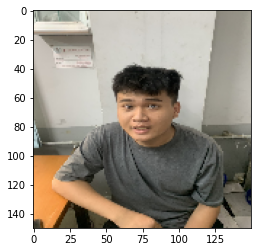

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/BT_AI/NHAN DIEN NGUOI/Test_set/GiangT1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='DUOC'
if round(result[0][1])==1:
  prediction='GIANG'
if round(result[0][2])==1:
  prediction='TRIEN'
print(prediction)

TRIEN


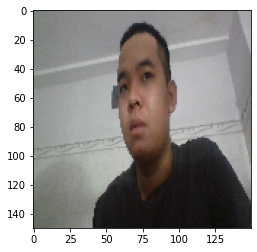

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/BT_AI/NHAN DIEN NGUOI/Test_set/TrienT3.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='DUOC'
if round(result[0][1])==1:
  prediction='GIANG'
if round(result[0][2])==1:
  prediction='TRIEN'
print(prediction)

In [ ]:
# Chuyển sang pdf
from google.colab import drive
drive.mount('/content/drive')
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('NHAN DIEN NGUOI.ipynb')